In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.linear_models.polinomic_regression import  PolinomicRegression
from allison.utils.functions.loss import mean_square_error
from allison.utils.metrics import r2_score
from allison.utils.functions.data import train_test_split

In [3]:
n = 1000
x=np.linspace(2,10,n)
y=x**2 + x+ 5*np.sin(x) + 3*np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,6.325090
1,2.008008,9.360121
2,2.016016,11.864102
3,2.024024,13.265442
4,2.032032,7.781392


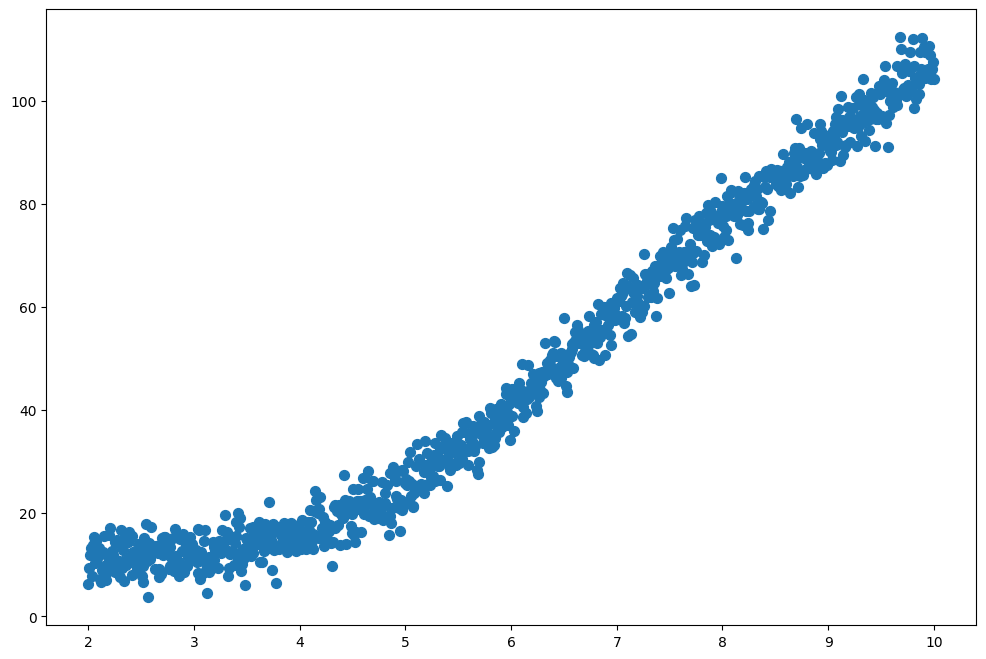

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=PolinomicRegression(loss_function=mean_square_error,
                      metric=r2_score,
                      lr = 0.0005,
                      n_grade=2)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_square_error: 121.889% 	 r2_score: 88.20% 

Iter:	4	==================================================>	 mean_square_error: 53.254% 	 r2_score: 94.85% 

Iter:	6	==================================================>	 mean_square_error: 30.004% 	 r2_score: 97.10% 

Iter:	8	==================================================>	 mean_square_error: 22.272% 	 r2_score: 97.84% 

Iter:	10	==================================================>	 mean_square_error: 19.787% 	 r2_score: 98.08% 

Iter:	12	==================================================>	 mean_square_error: 19.042% 	 r2_score: 98.16% 

Iter:	14	==================================================>	 mean_square_error: 18.852% 	 r2_score: 98.18% 

Iter:	16	==================================================>	 mean_square_error: 18.827% 	 r2_score: 98.18% 

Iter:	18	==================================================>	 mean_square_error: 18.843% 	 r2_score: 98.18% 

Iter:	20	====

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [121.88937576635358,
  53.25381243081022,
  30.004125281220286,
  22.272051485444052,
  19.78727850088796,
  19.042058187441476,
  18.852461707223252,
  18.827343209235664,
  18.842596650296244,
  18.862013987577466],
 'precision': [88.20231455552403,
  94.84555791817213,
  97.09589757204911,
  97.84428580443206,
  98.0847872418085,
  98.15691719398521,
  98.17526825715976,
  98.17769947921033,
  98.17622309705277,
  98.17434369094397],
 'params': [{'bias': array([0.98996023]),
   'weights': array([0.32235384, 0.80987445])},
  {'bias': array([0.99257605]), 'weights': array([0.33809535, 0.91868563])},
  {'bias': array([0.99411715]), 'weights': array([0.3473694 , 0.98279135])},
  {'bias': array([0.99502508]), 'weights': array([0.35283318, 1.02055901])},
  {'bias': array([0.99555999]), 'weights': array([0.35605214, 1.0428097 ])},
  {'bias': array([0.99587512]), 'weights': array([0.35794858, 1.05591861])},
  {'bias': array([0.99606079

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
model.evaluate(X_test, y_test)

98.08245070535531

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:98.08%)')

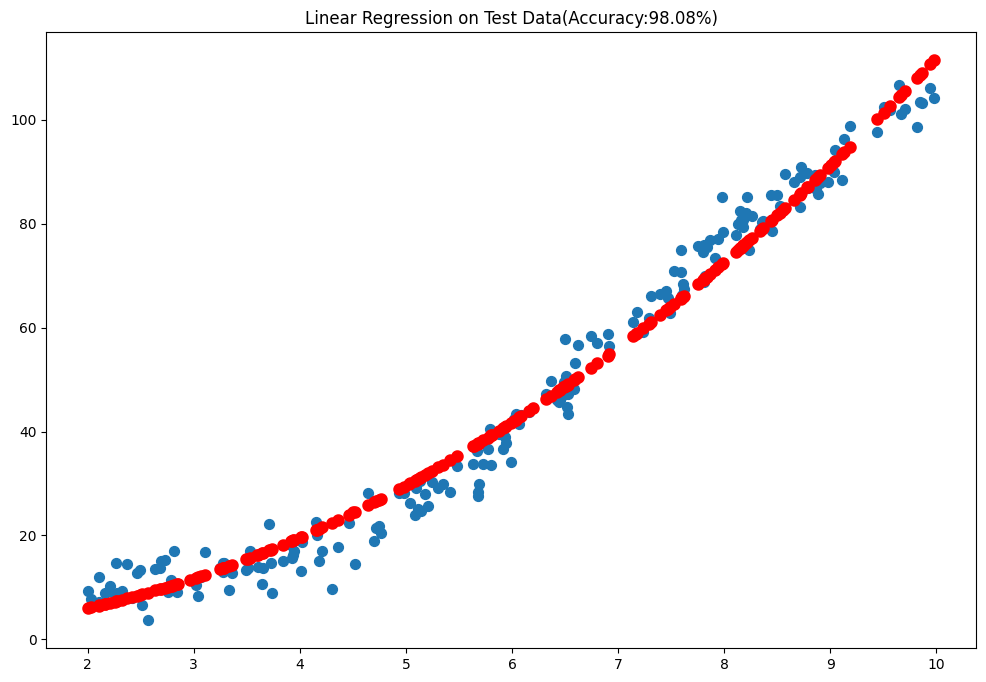

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.scatter(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{model.evaluate(X_test, y_test):.2f}%)')